In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_pickle('/ghds/groups/labdesk/bshih/c19dash/c19_dashboard/c19_read_counts.pickle')
df = df[df['sample_type'] == 'Sample'].reset_index().drop('level_0', axis=1)

df['RBP'] = df['pos_tube_rack'].str.extract(r'(.*?):.*$')
df['detected'] = df['replicate_call'] == 'detected'
df['not_detected'] = df['replicate_call'] == 'not_detected'
df['sample_count'] = 1

filtered = df[~df['pos_tube_rack'].str.contains(r'.*?:[A|B].*')].query("RBP == 'RBP201214A122'").dropna(how='all', axis=1)
filtered.loc[:, 'condition'] = '25'
filtered['RP'] = filtered['pos_extraction'].str.split(':').str[0] 
filtered['row'] = filtered['pos_tube_rack'].str.extract(r'.*?:(.).*')
filtered['column'] = filtered['pos_tube_rack'].str.extract(r'.*?:[A-Z](\d+)').astype('int')

In [3]:
filtered

,runid,run_sample_id,sample_type,parameter_set,index,barcode,covid_count,rnase_count,spikein_count,unknown,...,pos_pooling,barcode_pair_label,RBP,detected,not_detected,sample_count,condition,RP,row,column
329085,210203_NB552478_0015_AHT7W2BGXG,4052446315,Sample,Guardant19-RTPCR,CCAGCCTG_AATTTGGC,GCGTTCAGAT_TGGAACGGAG,419.0,2893.0,13146.0,2028.0,...,PRP200924A110:A1,plate1:D04,RBP201214A122,True,False,1,25,RP1201215A175,D,4
329086,210203_NB552478_0015_AHT7W2BGXG,4052446339,Sample,Guardant19-RTPCR,CCAGCCTG_AATTTGGC,ATCCGCCTAT_ACCGCGAAGT,0.0,3693.0,6893.0,2093.0,...,PRP200924A110:A1,plate1:F04,RBP201214A122,False,True,1,25,RP1201215A175,F,4
329087,210203_NB552478_0015_AHT7W2BGXG,4052446327,Sample,Guardant19-RTPCR,CCAGCCTG_AATTTGGC,CGTACCGTTA_CACTTATTCC,1045.0,4552.0,28467.0,806.0,...,PRP200924A110:A1,plate1:E04,RBP201214A122,True,False,1,25,RP1201215A175,E,4
329088,210203_NB552478_0015_AHT7W2BGXG,4052446328,Sample,Guardant19-RTPCR,CCAGCCTG_AATTTGGC,CCGAGACATA_GTACGGCTGA,0.0,1969.0,23430.0,5101.0,...,PRP200924A110:A1,plate1:E05,RBP201214A122,False,True,1,25,RP1201215A175,E,5
329089,210203_NB552478_0015_AHT7W2BGXG,4052446361,Sample,Guardant19-RTPCR,CCAGCCTG_AATTTGGC,AATCAGAACG_AGAGCTCAGA,0.0,1991.0,8207.0,1010.0,...,PRP200924A110:A1,plate1:H02,RBP201214A122,False,True,1,25,RP1201215A175,H,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329359,210203_NB552478_0015_AHT7W2BGXG,4052446362,Sample,Guardant19-RTPCR,GTAGGCTG_ACCCAGGT,CTGAACGGCT_ATTCCTTGGT,0.0,9039.0,13786.0,1083.0,...,PRP200924A110:C1,plate5:H03,RBP201214A122,False,True,1,25,RP4201116A147,H,3
329360,210203_NB552478_0015_AHT7W2BGXG,4052446364,Sample,Guardant19-RTPCR,GTAGGCTG_ACCCAGGT,ACCGTTAATC_CAGTACTTCC,0.0,5609.0,15405.0,2661.0,...,PRP200924A110:C1,plate5:H05,RBP201214A122,False,True,1,25,RP4201116A147,H,5
329361,210203_NB552478_0015_AHT7W2BGXG,4052446320,Sample,Guardant19-RTPCR,GTAGGCTG_ACCCAGGT,CTATTCGTCA_GTTACACCAA,0.0,9162.0,27469.0,674.0,...,PRP200924A110:C1,plate5:D09,RBP201214A122,False,True,1,25,RP4201116A147,D,9
329362,210203_NB552478_0015_AHT7W2BGXG,4052446368,Sample,Guardant19-RTPCR,GTAGGCTG_ACCCAGGT,TTGGACAACG_ATAGTGGACA,443.0,4298.0,16746.0,19.0,...,PRP200924A110:C1,plate5:H09,RBP201214A122,True,False,1,25,RP4201116A147,H,9


In [4]:
filtered.groupby('condition').agg(Detected = ('detected', 'sum'),
                                  Not_Detected = ('not_detected', 'sum'),
                                  Total_Samples = ('sample_count', 'sum'),
                                  Mean_Covid_Ratio = ('covid_ratio', 'mean'),
                                  Positive_Detection = ('detected', 'mean'))

,Detected,Not_Detected,Total_Samples,Mean_Covid_Ratio,Positive_Detection
condition,,,,,
25,108,108,216,0.024417,0.5


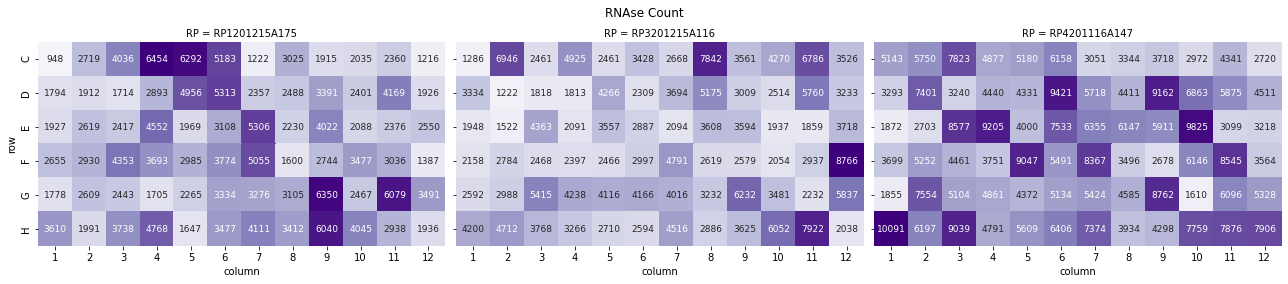

In [5]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2]).astype(dtype='int')
    sns.heatmap(d, cmap='Purples', vmin=500, annot=True, fmt='d', annot_kws={"fontsize":9}, **kwargs)

fg = sns.FacetGrid(filtered, col='RP', height=6, aspect=1)
fg.map_dataframe(draw_heatmap, 'column', 'row', 'rnase_count', cbar=False, square = True)
plt.suptitle('RNAse Count')
plt.subplots_adjust(top=1.3)
plt.show()

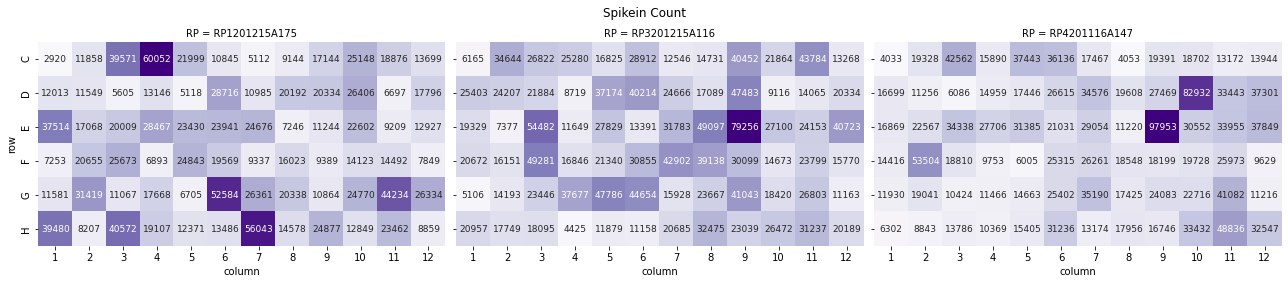

In [6]:
fg = sns.FacetGrid(filtered, col='RP', height=6, aspect=1)
fg.map_dataframe(draw_heatmap, 'column', 'row', 'spikein_count', cbar=False, square = True)
plt.suptitle('Spikein Count')
plt.subplots_adjust(top=1.3)
plt.show()